# Aprendizaje No Supervisado

Dataset:
[Mall Customer Segmentation Data](https://https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv)

Team: Leilani A. y Maria Jose E.

### Exploración de Datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# ROUTE
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from mpl_toolkits.mplot3d import Axes3D


# DATAFRAME
df = pd.read_csv('Mall_Customers.csv', encoding='utf-8', encoding_errors='replace')
# df = pd.read_csv('Mall_Customers.txt', encoding='utf-8', encoding_errors='replace')

# Tamaño de df
print("Tamaño df:\n", df.shape)

# Nombre de columnas
print("Columnas del df:\n", df.columns)

# primera 10 filas
df.head(10)

Tamaño df:
 (200, 5)
Columnas del df:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Comprobando si hay NANs
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Análisis de Datos

Variables Categoricas:
* Gender
* CustomerID


Variables Numericas:
* Age
* Annual Income (k$)
* Spending Score (1-100)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.describe().astype(int)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [7]:
df.info()

#print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


                             Age  Spending Score (1-100)  Annual Income (k$)
Age                     1.000000               -0.327227           -0.012398
Spending Score (1-100) -0.327227                1.000000            0.009903
Annual Income (k$)     -0.012398                0.009903            1.000000 



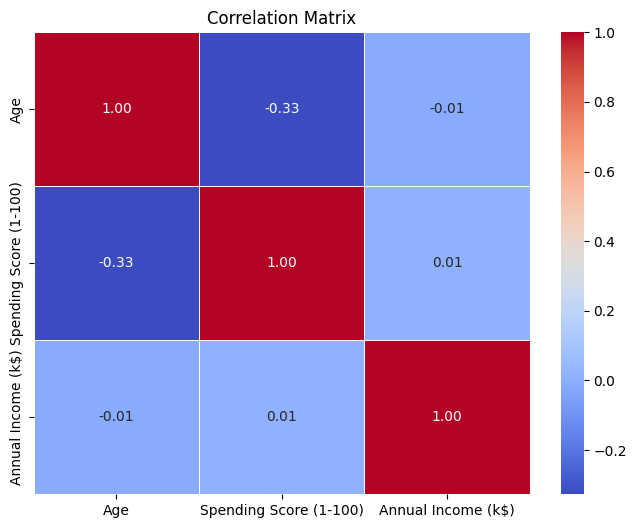

In [8]:
# Matriz de Correlacion
# CORR() -> calcula la correlacion de las columnas
correlation_matrix = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].corr()

print(correlation_matrix , "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Observando la matriz vemos que no hay ninguna correlacion alta entre variables.
Podemos concluir que:

* Age y Spending Score (1-100): Cuando la edad incrementa, el spending score disminuye.

* Age y Annual Income: Al ser tan cerca a 0, nos indica que la edad no tiene un impacto en el income de la persona.

* Annual Income y Spending Score (1-100): El income no tiene impacto en el Spending Score.

Gender
Female    112
Male       88
Name: count, dtype: int64 

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64 



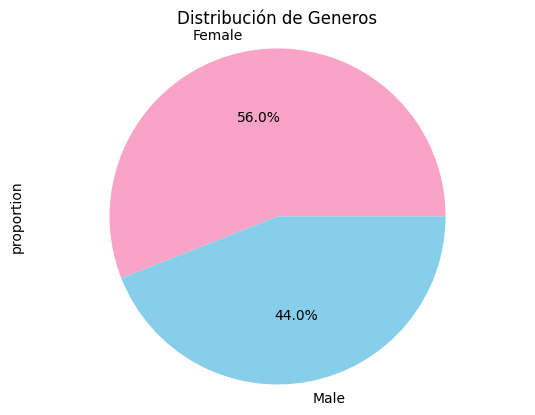

In [9]:
# Calculando la distribución de GENDER en la data
print(df['Gender'].value_counts(), '\n')
print(df['Gender'].value_counts(normalize=True,), '\n')

# Visualización de la distribución de GENDER
df['Gender'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['#f9a3c7', '#87ceeb'])
plt.title('Distribución de Generos')
plt.axis('equal')
plt.show()

El punto máximo de age es 32 años. 

El punto mínimo de age es 18 años. 



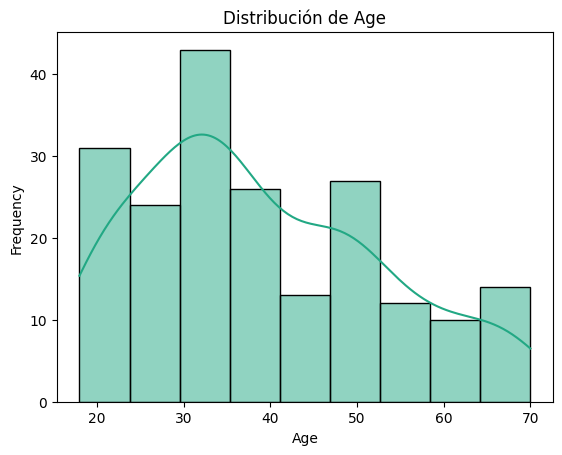

In [10]:
# Visualización de la Distribución de variable AGE

# import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import mode
fig, axs = plt.subplots(1, 1)

sns.histplot(df['Age'], kde=True, color = '#22a884', ax=axs)
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Edad mas frecuente (PEAK)
age_mode = mode(df['Age'])[0]
print(f"El punto máximo de age es {age_mode} años.", "\n")

# THROUGH
age_trough = df['Age'].min()
print(f"El punto mínimo de age es {age_trough} años.", "\n")

plt.show()

El punto máximo de Annual Income (k$) es 54k dólares. 

El punto mínimo de Annual Income (k$) es 15k dólares. 



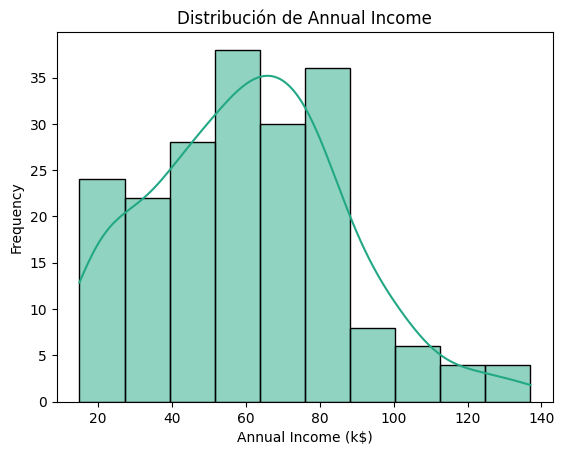

In [11]:
# Visualización de la Distribución de ANNUAL INCOME
fig, axs = plt.subplots(1, 1)

sns.histplot(df['Annual Income (k$)'], kde=True, color = '#22a884', ax=axs)
plt.title('Distribución de Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# PEAK
annual_income_mode = mode(df['Annual Income (k$)'])[0]
print(f"El punto máximo de Annual Income (k$) es {annual_income_mode}k dólares.", "\n")

# TROUGH
annual_income_trough = df['Annual Income (k$)'].min()
print(f"El punto mínimo de Annual Income (k$) es {annual_income_trough}k dólares.", "\n")

plt.show()

El punto máximo en Spending Score (1-100) es 42. 

El punto mínimo en Spending Score (1-100) es 1. 



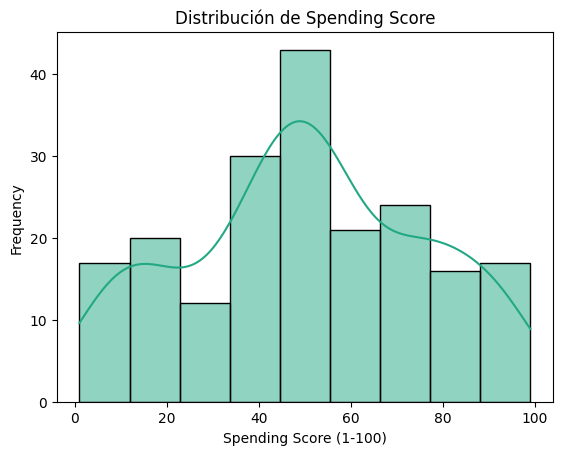

In [12]:
# Visualización de la Distribución en SPENDING SCORE
fig, axs = plt.subplots(1, 1)

sns.histplot(df['Spending Score (1-100)'], kde=True, color = '#22a884', ax=axs)
plt.title('Distribución de Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

# Valor mas frecuente
spending_score_mode = mode(df['Spending Score (1-100)'])[0]
print(f"El punto máximo en Spending Score (1-100) es {spending_score_mode}.", "\n")

# THROUGH
spending_score_trough = df['Spending Score (1-100)'].min()
print(f"El punto mínimo en Spending Score (1-100) es {spending_score_trough}.", "\n")

plt.show()

### Estandarizar

Para normalizar la data usando la estandarización, es necesario extraer la media y dividirla entre la desviacion standard para cada características:
* 'Age'
* 'Spending Score (1-100)'
* 'Annual Income (k$)'

Este proceso nos asegura que cada característica tenga una media de 0 y desviación estándar de 1.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans

# FEAUTURES
features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Estandarizacion
# Creando el objecto StandardScaler
scaler = StandardScaler()
# FIT y TRANSFORM la data
features_scaled = scaler.fit_transform(features)

print(features_scaled)

[[-1.42456879 -0.43480148 -1.73899919]
 [-1.28103541  1.19570407 -1.73899919]
 [-1.3528021  -1.71591298 -1.70082976]
 [-1.13750203  1.04041783 -1.70082976]
 [-0.56336851 -0.39597992 -1.66266033]
 [-1.20926872  1.00159627 -1.66266033]
 [-0.27630176 -1.71591298 -1.62449091]
 [-1.13750203  1.70038436 -1.62449091]
 [ 1.80493225 -1.83237767 -1.58632148]
 [-0.6351352   0.84631002 -1.58632148]
 [ 2.02023231 -1.4053405  -1.58632148]
 [-0.27630176  1.89449216 -1.58632148]
 [ 1.37433211 -1.36651894 -1.54815205]
 [-1.06573534  1.04041783 -1.54815205]
 [-0.13276838 -1.44416206 -1.54815205]
 [-1.20926872  1.11806095 -1.54815205]
 [-0.27630176 -0.59008772 -1.50998262]
 [-1.3528021   0.61338066 -1.50998262]
 [ 0.94373197 -0.82301709 -1.43364376]
 [-0.27630176  1.8556706  -1.43364376]
 [-0.27630176 -0.59008772 -1.39547433]
 [-0.99396865  0.88513158 -1.39547433]
 [ 0.51313183 -1.75473454 -1.3573049 ]
 [-0.56336851  0.88513158 -1.3573049 ]
 [ 1.08726535 -1.4053405  -1.24279661]
 [-0.70690189  1.23452563

Otra alternativa que podríamos haber utilizado es la Estandarización Min-Max. Esta reduciria las caracteristicas a un intervalo en comun entre 0 y 1.

```
from sklearn.preprocessing import MinMaxScaler
# FEAUTURES
features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
# FIT & TRANSFORM THE DATA
features_scaled = scaler.fit_transform(features)
```


### K-Means de variable numericas

In [14]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
ykmeans = kmeans.predict(features_scaled)
y_kmeans = kmeans.labels_

# Añade etiqueda del grupo del cluster donde cada fila se encuentra
df['Cluster'] = kmeans.labels_ + 1

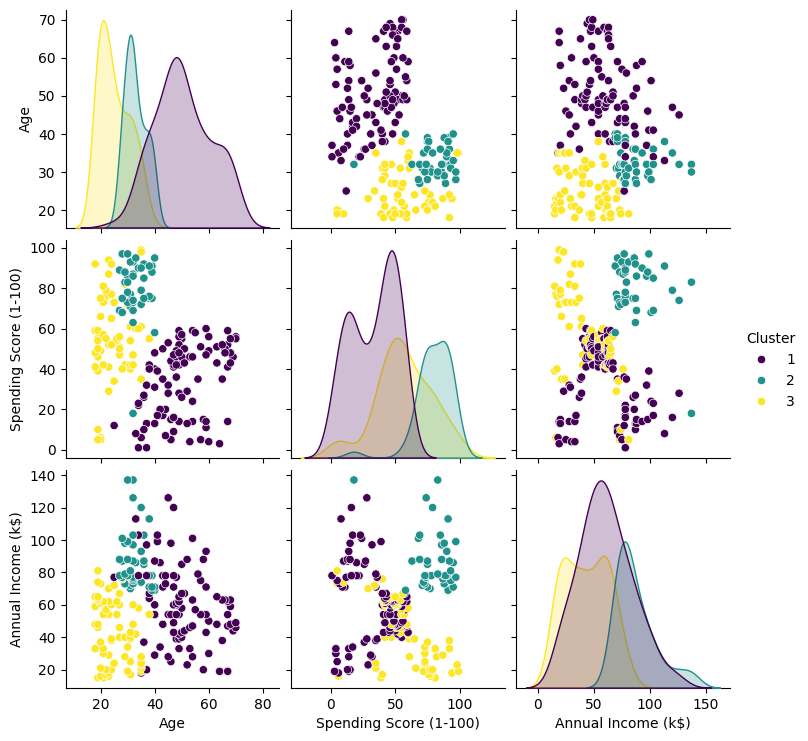

In [15]:
# cluster 3 a traves de las variables
sns.pairplot(df, vars=['Age', 'Spending Score (1-100)', 'Annual Income (k$)'], hue='Cluster', palette='viridis')
plt.show()

Estos diagramas nos permite entender la estructura de nuestros datos y detectar posibles patrones en el dataset. Por ejemplo, el diagrama "Age vs. Spending Score" muestra que las personas de edad avanzada `(cluster 1)` suelen tener spending scores moderados, mientras que las personas de menor edad `(cluster 2)` y de alto ingreso `(cluster 3)` suelen tener spending scores superiores.


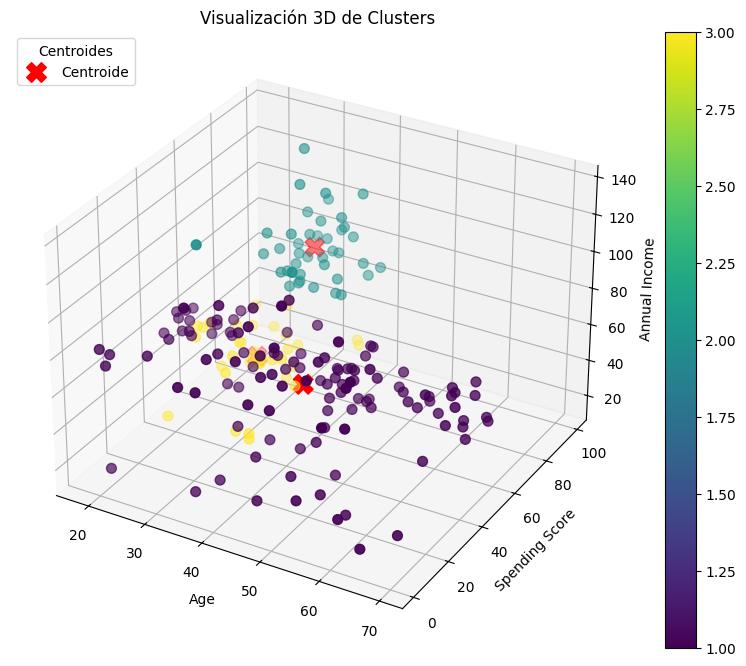

In [16]:
features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
df['Cluster'] = kmeans.labels_ + 1
centroids = kmeans.cluster_centers_

# Creacion de un scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Spending Score (1-100)'], df['Annual Income (k$)'],
    c=df['Cluster'], cmap='viridis', s=50)

# Centroides
ax.scatter(
    centroids[:, 0],  # Centroid Age
    centroids[:, 1],  # Centroid Spending Score
    centroids[:, 2],  # Centroid Annual Income
    c='red',
    s=200,
    marker='X',
    label='Centroide'
)

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('Visualización 3D de Clusters')
plt.colorbar(scatter)
ax.legend(loc='upper left', title='Centroides')

plt.show()

Podemos observar la correlación entre edad, spending score, y anual income, y cómo estos factores influyen en la formación de específicos segmentos de clientes.

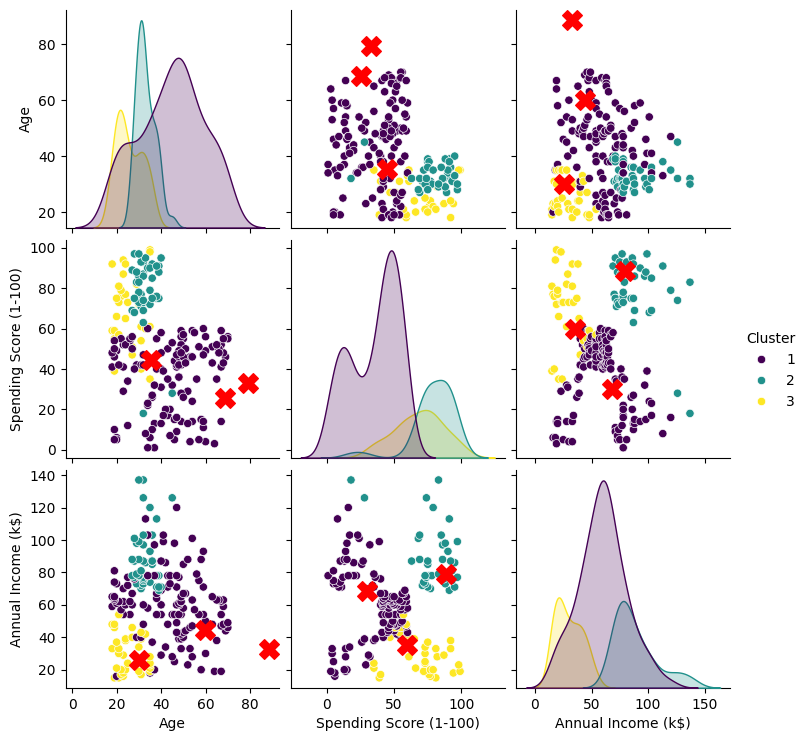

In [17]:
#features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
#kmeans = KMeans(n_clusters=3, random_state=42)
#kmeans.fit(features)
#df['Cluster'] = kmeans.labels_ + 1
#centroids = kmeans.cluster_centers_

# Creando el pairplot
pairplot = sns.pairplot(
    df,
    vars=['Age', 'Spending Score (1-100)', 'Annual Income (k$)'],
    hue='Cluster',
    palette='viridis'
)

# Nested For Loops
for i, x_var in enumerate(['Age', 'Spending Score (1-100)', 'Annual Income (k$)']):
    for j, y_var in enumerate(['Age', 'Spending Score (1-100)', 'Annual Income (k$)']):
        if i != j:  # Añadir Centroides solo a los scatterplots. No a los histogramas
            ax = pairplot.axes[i, j]
            ax.scatter(
                centroids[:, features.columns.get_loc(x_var)],  # X-coordinates para los centroides
                centroids[:, features.columns.get_loc(y_var)],  # Y-coordinates para los centroides
                c='red',
                s=200,
                marker='X',
                label='Centroid'
            )

            # Añadiendo legenda
            handles, labels = ax.get_legend_handles_labels()
            if 'Centroid' not in labels:
                ax.legend(handles + [plt.Line2D([], [], color='red', marker='X', markersize=10, linestyle='None', label='Centroid')])

plt.show()

### Silhouette Análisis

El número óptimo de clusters es: 6 



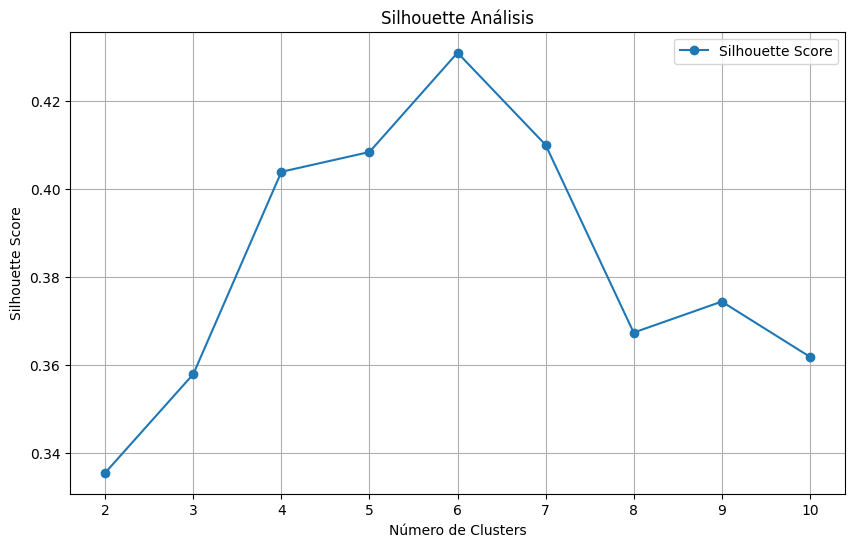

In [18]:
from sklearn.metrics import silhouette_score
# GET NUMBER OF CLUSTERS USING SILHOUTTE SCORE
silhouette_scores = []

# Test for number of clusters from 2 to 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)  # Calculate silhouette score
    silhouette_scores.append(score)

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"El número óptimo de clusters es: {optimal_clusters} \n")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Análisis')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.legend()
plt.show()

Al comparar los puntajes de silueta con la cantidad de grupos, podemos observar visualmente el "codo" .  Esto nos ayuda en establecer la cantidad ideal de grupos que se deben emplear para el k-means.


### Método Codo

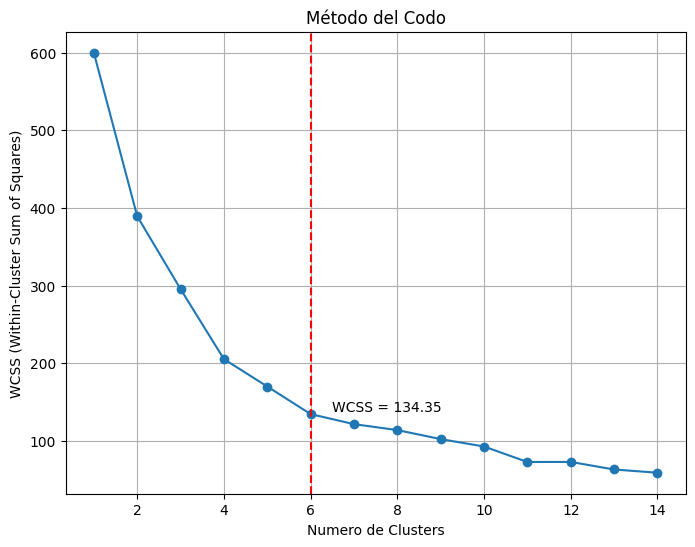

In [19]:
# wccs (WITHIN-CLUSTER SUM OF SQUARES): mide la cercanía entre los puntos que conforman un clúster.
wcss = []
# Probando los numeros de clusters
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')

optimal_k = 6  # Linea roja

# Obtener el wcss para determinar el number óptimo de clusters
optimal_wcss = wcss[optimal_k - 1]
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Codo en k={optimal_k}')
plt.text(optimal_k + 0.5, optimal_wcss, f'WCSS = {optimal_wcss:.2f}', ha='left', va='bottom')

plt.title('Método del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


Este número, optimal_k (6) apoya la selección del número de agrupaciones seleccionado por el método del codo.


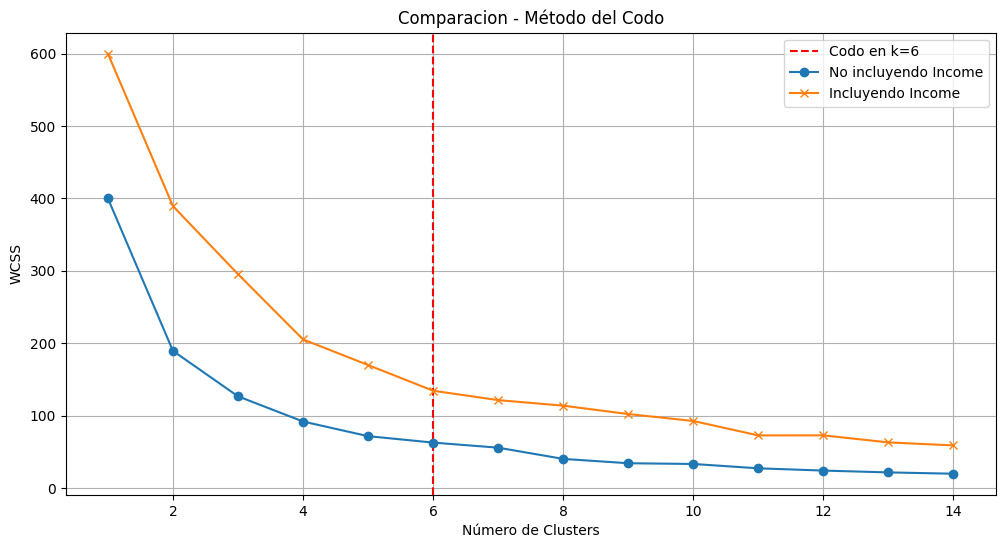

In [20]:
# COMPARACION entre incluir Annual Income o no

# Features: Age y Spending Score
features1 = df[['Age', 'Spending Score (1-100)']]

# Features: Age, Spending Score y Income
features2 = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Estandarizar ambos
scaler = StandardScaler()
features1_scaled = scaler.fit_transform(features1)
features2_scaled = scaler.fit_transform(features2)

wcss1, wcss2 = [], []
k_range = range(1, 15)
for k in k_range:
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(features1_scaled)
    wcss1.append(kmeans1.inertia_)

    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(features2_scaled)
    wcss2.append(kmeans2.inertia_)


plt.figure(figsize=(12, 6))

# linea roja
elbow_k = 6
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Codo en k={elbow_k}')

# plot para el metodo del codo
plt.plot(k_range, wcss1, marker='o', label='No incluyendo Income')
plt.plot(k_range, wcss2, marker='x', label='Incluyendo Income')
plt.title('Comparacion - Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid()
plt.show()


Esta comparación nos permite ver determinar si la incorporación de la característica Annual Income (k$) mejora el rendimiento del clustering o no.

### K-Means déspues del Método del Codo y Análisis

#### K-Means

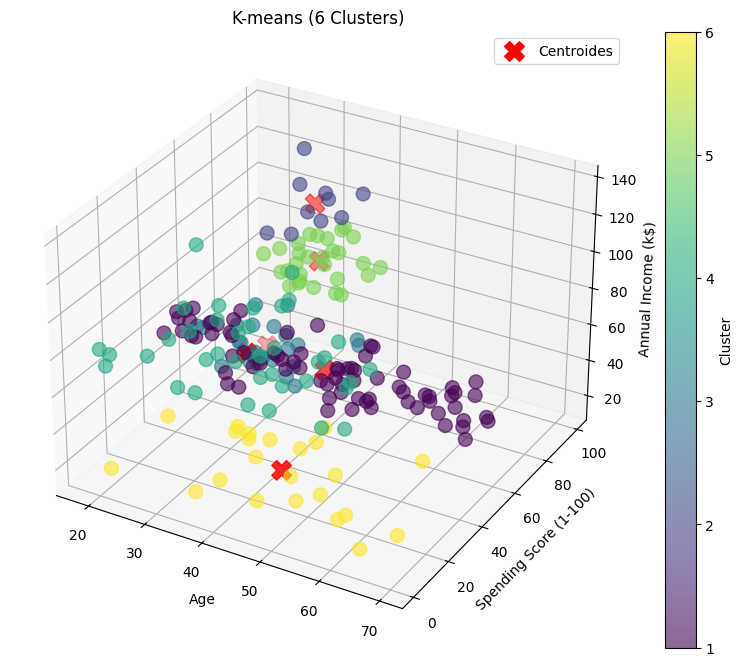

In [21]:
# Aplicar K-means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']])

# Asignar el numero del cluster que la fila pertenece
df['Cluster'] = kmeans.labels_ + 1

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Age'], df['Spending Score (1-100)'], df['Annual Income (k$)'],
                c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroides')


ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('K-means (6 Clusters)')
fig.colorbar(sc, label='Cluster')
plt.legend()
plt.show()


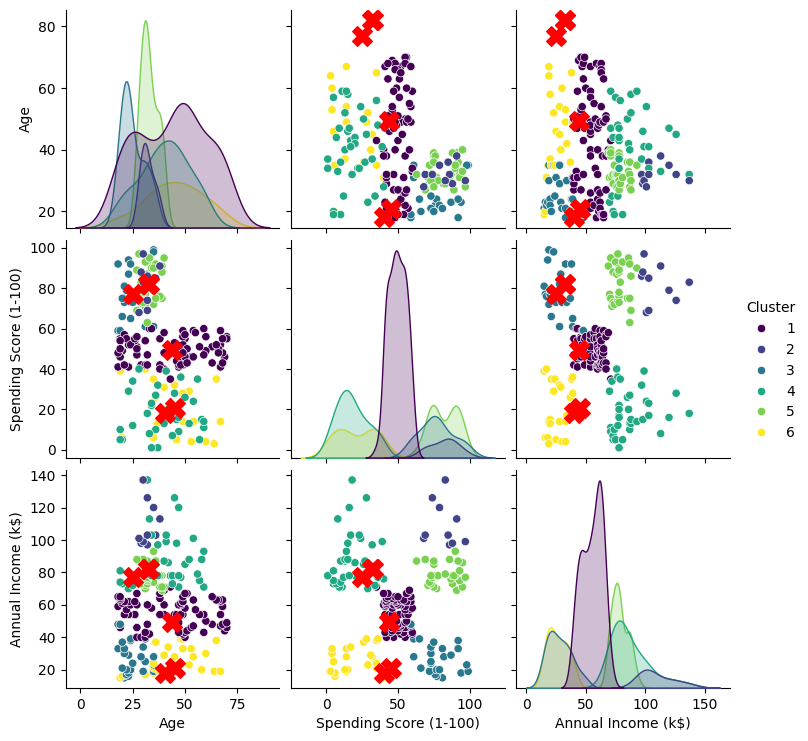

In [22]:
pairplot = sns.pairplot(df, vars=['Age', 'Spending Score (1-100)', 'Annual Income (k$)'], hue='Cluster', palette='viridis')

for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes[i])):
        if i != j:  # Solo para los scatterplots
            for centroid in centroids:
                pairplot.axes[i, j].scatter(centroid[0], centroid[1], c='red', s=200, marker='X', label='Centroid')

plt.show()

#### Análisis de los resultados

##### Promedio por Cluster

In [23]:
# Podemos ver el valor promedio de cada cluster en terminos de Edad, Income y Spending Score.

# Valor Promedio de cada cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Mostrar los valores promedio de cada cluster
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
1,43,55,49
2,32,109,82
3,24,28,77
4,40,87,18
5,32,78,82
6,45,26,20


##### Clusters basado en Income y Spending Score

Este próximo gráfico nos enseña lo siguiente:
* Las personas que ganan un income entre 40k y 80k tienen un Spending Score mediano 40 y 60.
* Mientras que personas que ganan 80k o mas tienen un Spending Score bajo o alto. No tienen un Spending Score mediano. Lo mismo sucede con las personas que ganan menos de 40k.

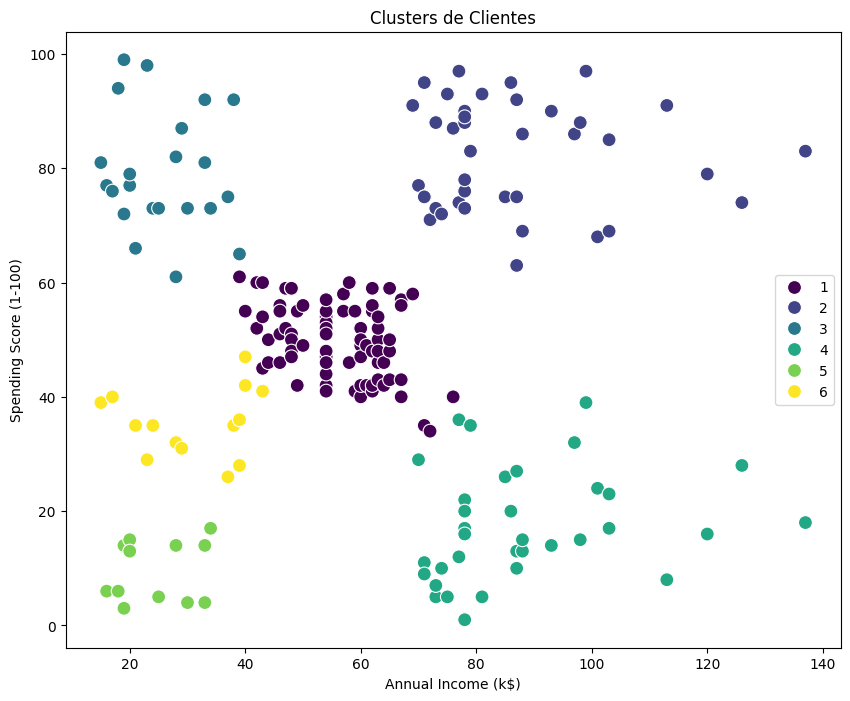

In [24]:
kmeans = KMeans(n_clusters=6, random_state=42)  # 4 Clusters
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) # No incluye Age en este escenario

df['Cluster'] = kmeans.labels_ + 1

# Scatter plot de Annual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('Clusters de Clientes')
plt.legend()
plt.show()

##### Clusters basado en Age y Spending Score

En el siguiente gráfico se ve que:
* Despues de los 40 años el spending score de las personas disminuye. Significando que mayores de 40 compran menos en el centro comercial.
* Personas jovenes, menores de 40 años tienden a gastar mas y tienen un Spending Score mayor.

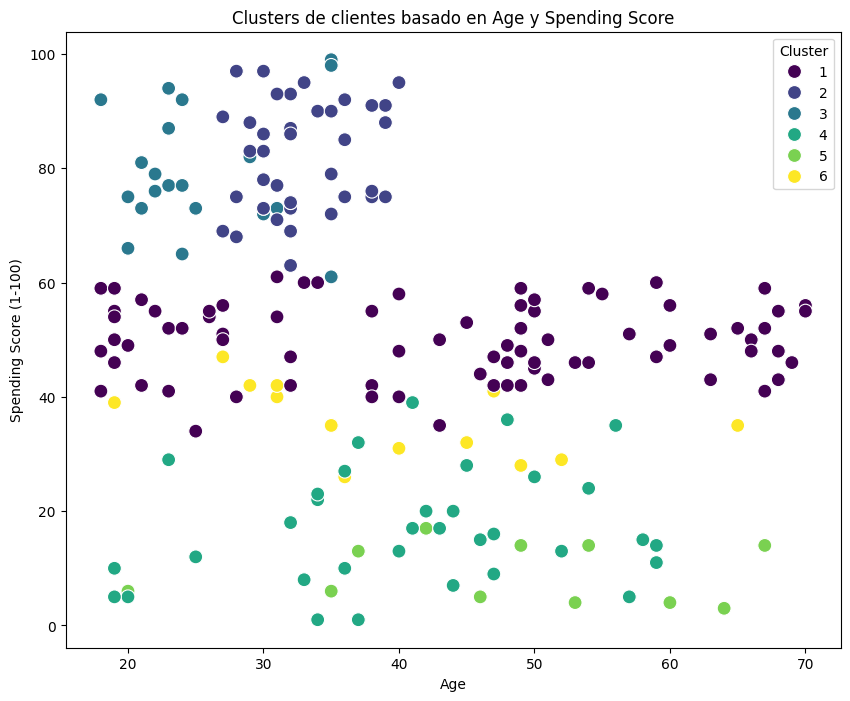

In [25]:
# Scatter plot de Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('Clusters de clientes basado en Age y Spending Score')

plt.show()

##### Distribución de Gender a traves de los clusters

Desde la *Exploración de Datos* que se trabajo al principio se conocia que en la data **habian mas clientes mujeres que hombres**.

En este grafico se puede apreciar como se distribuyo entre los clusters.

El **Cluster 4** es el único en el que se observa una mayor presencia de hombres que de mujeres. Al analizar los gráficos previos, se puede notar que las personas en este cluster tienen un Spending Score de 40 o menos.

En cambio, el **Cluster 1**, que tiene una representación significativamente mayor de mujeres, muestra que estas tienen un Spending Score intermedio, entre 40 y 60.

El **Cluster 5** posee la cantidad total de individuos más baja.

Llegamos a la conclusión que **las mujeres forman parte fundamental en los centros comerciales sin importar la edad o el nivel de income generado.**




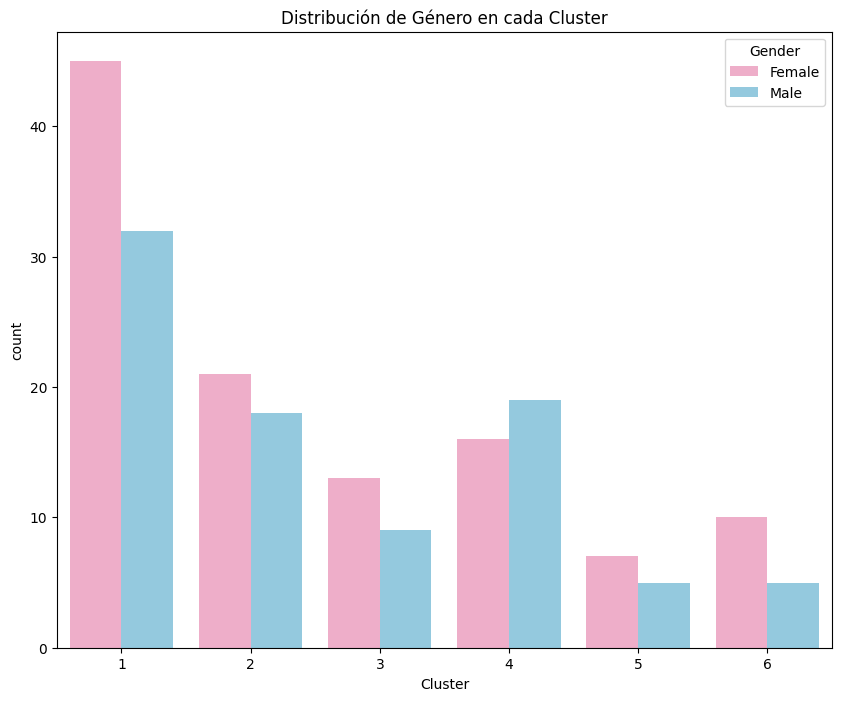

In [26]:
plt.figure(figsize=(10, 8))
custom_colors = ['#f9a3c7', '#87ceeb'] # color rosa y azul
sns.countplot(data=df, x='Cluster', hue='Gender', palette = custom_colors)

plt.title('Distribución de Género en cada Cluster')

plt.show()

### PCA (Principal Component Analysis) - Unsupervised Learning Algorithm

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


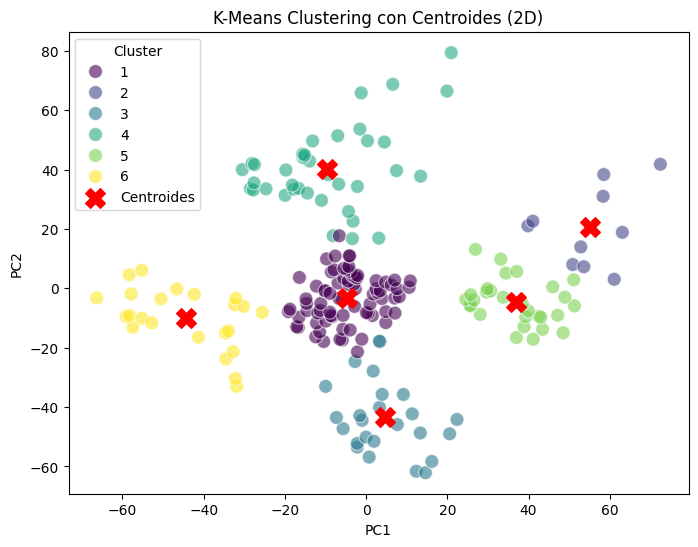

In [27]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]) + 1

# Proyectar la data 3D a 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']])

# Creando un df con los componentes de PCA
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# 2D PCA data con clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Centroides
centroids = kmeans.cluster_centers_
centroids_2d = pca.transform(centroids[:, [0, 1, 2]])  # Project centroids to 2D
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.title("K-Means Clustering con Centroides (2D)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

plt.show()


In [28]:
# Cantidad de valores en cada Cluster
print(df['Cluster'].value_counts())

Cluster
1    76
4    37
5    29
3    25
6    23
2    10
Name: count, dtype: int64


* En el cluster 1 hay 76 puntos de data
* En el cluster 2 hay 10 puntos de data
* En el cluster 3 hay 24 puntos de data
* En el cluster 4 hay 37 puntos de data
* En el cluster 5 hay 29 puntos de data
* En el cluster 6 hay 23 puntos de data


In [29]:
data = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Aplicando PCA
pca = PCA(n_components=2)
pca.fit(data)

# Compnentes de cada componente principal
print("PC:")
print(pca.components_)

PC:
[[-0.1889742   0.7859965   0.58864102]
 [ 0.1309652  -0.57391358  0.80837573]]


* Primera fila (PC1): [-0.1889742   0.7859965   0.58864102]
    * PC1 captura la mayor variación posible en los datos.
    * Podemos concluir que PC1 esta altamente influenciado principalmente por Spending Score. Annual Income tambien tiene un peso significativo en PC1
* Segunda fila (PC2): [ 0.1309652  -0.57391358  0.80837573]
    * PC2 captura la segunda variación más grande en los datos
    * Podemos concluir que PC2 esta altamente influenciado por Annual Income y negativamente influenciado por Spending Score.

En ambas, PC1 y PC2, la variable Age tiene la menos contribución en los componented de PCA.